In [ ]:
## Exercise with the wine dataset from sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [ ]:
#load the data
dataset = load_wine()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
# Create a target column with the dataset target
y = dataset.target

In [ ]:
# print the target_names
print(dataset.target_names)

['class_0' 'class_1' 'class_2']


In [ ]:
# print the first 5 rows of the dataset
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [ ]:
#make sure that the columns have the correct label

In [ ]:
#print the shape of the dataset
data.shape

(178, 13)

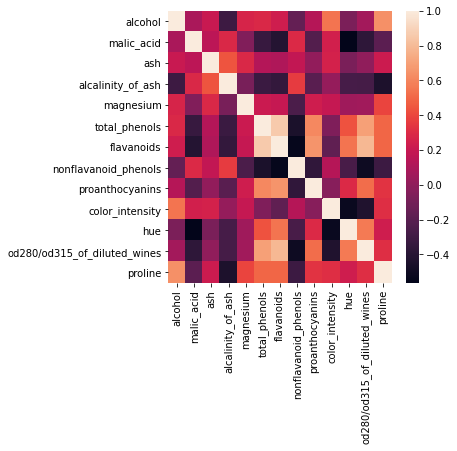

In [ ]:
#evaluate features for correlations

plt.figure(figsize=(5,5))
sns.heatmap(data.corr())
plt.show()

In [ ]:
#choose features from heat plot
features = ['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'hue', 'proline']

In [ ]:
#set X to features and y to target
X = data[features]

In [ ]:
#split train and test data with 80/20 split
X_train, X_test, Y_train,  Y_test = train_test_split(X,y,test_size=0.2)


In [ ]:

#normalize fetures
#I think we should scale after splitting 
X_train = StandardScaler().fit_transform(X_train) 
X_test = StandardScaler().fit_transform(X_test)

In [ ]:
#Now, we classify with a Random forest
rfc = RandomForestClassifier(random_state=99)
rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=99)

In [ ]:
print('Training Score: {}'.format(rfc.score(X_train, Y_train)))
print('Testing Score: {}'.format(rfc.score(X_test, Y_test)))

Training Score: 1.0
Testing Score: 0.9444444444444444


## Pretty good, huh? 
- What if we want to use another [classifier from sklearn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)?

In [ ]:
########################################################
########################################################
#K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
print('Training Score: {}'.format(knn.score(X_train, Y_train)))
print('Testing Score: {}'.format(knn.score(X_test, Y_test)))

Training Score: 0.7183098591549296
Testing Score: 0.75


In [ ]:
########################################################
########################################################
#Support vector machines
svc = SVC(random_state=99)
svc.fit(X_train, Y_train)

SVC(random_state=99)

In [ ]:
print('Training Score: {}'.format(svc.score(X_train, Y_train)))
print('Testing Score: {}'.format(svc.score(X_test, Y_test)))

Training Score: 0.7253521126760564
Testing Score: 0.6666666666666666


In [ ]:
########################################################
########################################################
#Naive Bayes Guassian
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
print('Training Score: {}'.format(gnb.score(X_train, Y_train)))
print('Testing Score: {}'.format(gnb.score(X_test, Y_test)))

Training Score: 0.9577464788732394
Testing Score: 0.8888888888888888
